<a href="https://colab.research.google.com/github/Alan-Cheong/IEEE_QW_2020/blob/master/Feynman_Diagram_Property_Purchase_Payment_Schedule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Property Transaction Simulation ---

Week 1:
  [!] Delay at step: Exercise Option
Week 2:
  [+] Completed: Exercise Option — Payment: 5% (Total Paid: 5%)
  [+] Completed: Downpayment — Payment: 15% (Total Paid: 20%)
  [+] Completed: SAL Stakeholding — Payment: 15% (Total Paid: 35%)
Week 3:
  [+] Completed: Foundation Work — Payment: 10% (Total Paid: 45%)
Week 4:
  [+] Completed: RC Framework — Payment: 10% (Total Paid: 55%)
  [+] Completed: Partition Walls — Payment: 5% (Total Paid: 60%)
  [+] Completed: Ceiling Complete — Payment: 5% (Total Paid: 65%)
Week 5:
  [+] Completed: Electrical/Plumbing — Payment: 5% (Total Paid: 70%)
Week 6:
  [!] Delay at step: Infrastructure
Week 7:
  [+] Completed: Infrastructure — Payment: 5% (Total Paid: 75%)
  [!] Delay at step: TOP/CSC/Gas
Week 8:
Week 9:
Week 10:
Week 11:
  [+] Completed: TOP/CSC/Gas — Payment: 25% (Total Paid: 100%)

--- Simulation Complete ---
Total Progress: 10 / 10 milestones completed
Total Paid: 100%


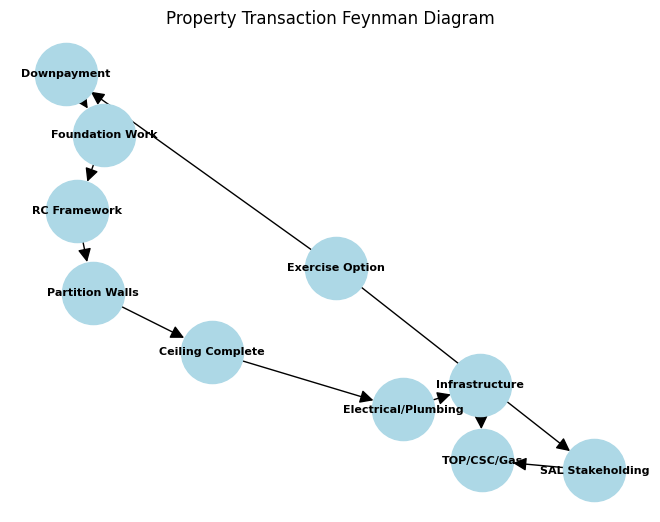

In [2]:
!pip install matplotlib networkx
import random
import time
import matplotlib.pyplot as plt
import networkx as nx

# Define transaction steps
steps = [
    {"name": "Exercise Option", "payment": 5, "delay": 0, "depends_on": [], "max_weeks": 1},
    {"name": "Downpayment", "payment": 15, "delay": 0, "depends_on": [0], "max_weeks": 8},
    {"name": "Foundation Work", "payment": 10, "delay": 2, "depends_on": [1]},
    {"name": "RC Framework", "payment": 10, "delay": 2, "depends_on": [2]},
    {"name": "Partition Walls", "payment": 5, "delay": 1, "depends_on": [3]},
    {"name": "Ceiling Complete", "payment": 5, "delay": 1, "depends_on": [4]},
    {"name": "SAL Stakeholding", "payment": 15, "delay": 1, "depends_on": [0]},
    {"name": "Electrical/Plumbing", "payment": 5, "delay": 2, "depends_on": [5]},
    {"name": "Infrastructure", "payment": 5, "delay": 2, "depends_on": [7]},
    {"name": "TOP/CSC/Gas", "payment": 25, "delay": 4, "depends_on": [6, 8]},
]

# Initialize state
completed = [False] * len(steps)
current_week = 0
max_weeks = 52
status_log = []
total_paid = 0

print("\n--- Property Transaction Simulation ---\n")

while current_week < max_weeks and not all(completed):
    print(f"Week {current_week + 1}:")
    for i, step in enumerate(steps):
        if completed[i]:
            continue

        dependencies_met = all(completed[d] for d in step.get("depends_on", []))
        if dependencies_met:
            # Introduce random risk of delay (10%)
            if random.random() < 0.1:
                print(f"  [!] Delay at step: {step['name']}")
                continue

            # Simulate delay in weeks
            if "weeks_waited" not in step:
                step["weeks_waited"] = 0

            step["weeks_waited"] += 1
            if step.get("max_weeks") and step["weeks_waited"] > step["max_weeks"]:
                print(f"  [!] Missed deadline for {step['name']} (default risk)")
                continue

            if step["weeks_waited"] >= step.get("delay", 0):
                completed[i] = True
                total_paid += step["payment"]
                print(f"  [+] Completed: {step['name']} — Payment: {step['payment']}% (Total Paid: {total_paid}%)")

    status_log.append((current_week + 1, total_paid))
    current_week += 1
    time.sleep(0.1)  # Simulate passage of time visually (optional)

print("\n--- Simulation Complete ---")
print(f"Total Progress: {sum(completed)} / {len(steps)} milestones completed")
print(f"Total Paid: {total_paid}%")

# Draw diagram of transaction process using NetworkX
G = nx.DiGraph()

# Add nodes and edges
for i, step in enumerate(steps):
    G.add_node(i, label=step["name"])
    for dep in step.get("depends_on", []):
        G.add_edge(dep, i)

# Draw graph
pos = nx.spring_layout(G, seed=42)
labels = {i: step["name"] for i, step in enumerate(steps)}
nx.draw(G, pos, with_labels=True, labels=labels, node_size=2000, node_color="lightblue", font_size=8, font_weight='bold', arrowsize=20)
plt.title("Property Transaction Feynman Diagram")
plt.show()


In [6]:
!pip install plotly networkx
import random
import time
import plotly.graph_objects as go
import networkx as nx
from IPython.display import display, HTML

# Define transaction steps
steps = [
    {"name": "Exercise Option", "payment": 5, "delay": 0, "depends_on": [], "max_weeks": 1},
    {"name": "Downpayment", "payment": 15, "delay": 0, "depends_on": [0], "max_weeks": 8},
    {"name": "Foundation Work", "payment": 10, "delay": 2, "depends_on": [1]},
    {"name": "RC Framework", "payment": 10, "delay": 2, "depends_on": [2]},
    {"name": "Partition Walls", "payment": 5, "delay": 1, "depends_on": [3]},
    {"name": "Ceiling Complete", "payment": 5, "delay": 1, "depends_on": [4]},
    {"name": "SAL Stakeholding", "payment": 15, "delay": 1, "depends_on": [0]},
    {"name": "Electrical/Plumbing", "payment": 5, "delay": 2, "depends_on": [5]},
    {"name": "Infrastructure", "payment": 5, "delay": 2, "depends_on": [7]},
    {"name": "TOP/CSC/Gas", "payment": 25, "delay": 4, "depends_on": [6, 8]},
]

completed = [False] * len(steps)
current_week = 0
max_weeks = 52
status_log = []
total_paid = 0
progression = []

while current_week < max_weeks and not all(completed):
    for i, step in enumerate(steps):
        if completed[i]:
            continue

        dependencies_met = all(completed[d] for d in step.get("depends_on", []))
        if dependencies_met:
            if random.random() < 0.1:
                continue

            if "weeks_waited" not in step:
                step["weeks_waited"] = 0

            step["weeks_waited"] += 1
            if step.get("max_weeks") and step["weeks_waited"] > step["max_weeks"]:
                continue

            if step["weeks_waited"] >= step.get("delay", 0):
                completed[i] = True
                total_paid += step["payment"]
                progression.append(i)

    status_log.append((current_week + 1, total_paid))
    current_week += 1

# Build the directed graph
G = nx.DiGraph()
for i, step in enumerate(steps):
    label = f"{step['name']}\nEnergy: {step['payment']}%"
    G.add_node(i, label=label)
    for dep in step.get("depends_on", []):
        G.add_edge(dep, i)

pos = nx.spring_layout(G, seed=42)
x_vals = [pos[i][0] for i in G.nodes()]
y_vals = [pos[i][1] for i in G.nodes()]
labels = [G.nodes[i]['label'] for i in G.nodes()]

# Draw edges
edge_x, edge_y = [], []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#888'),
    hoverinfo='none',
    mode='lines')

# Draw nodes with animation frames
frames = []
for week in range(len(progression)):
    color_map = ['darkmagenta' if i in progression[:week+1] else 'lightgray' for i in G.nodes()]
    node_trace = go.Scatter(
        x=x_vals, y=y_vals,
        mode='markers+text',
        text=labels,
        textposition="top center",
        marker=dict(color=color_map, size=30, line=dict(width=2)),
        hoverinfo='text')

    frames.append(go.Frame(data=[edge_trace, node_trace], name=f"Week {week+1}"))

# Initial trace
init_color_map = ['lightgray'] * len(G.nodes())
node_trace = go.Scatter(
    x=x_vals, y=y_vals,
    mode='markers+text',
    text=labels,
    textposition="top center",
    marker=dict(color=init_color_map, size=30, line=dict(width=2)),
    hoverinfo='text')

fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title='Property Transaction Process as Quantum-like States',
        titlefont_size=16,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20,l=5,r=5,t=40),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play", method="animate", args=[None]),
                     dict(label="Pause", method="animate", args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate"}])])]),
    frames=frames
)

fig.show()


In [12]:
!pip install plotly networkx
import random
import plotly.graph_objects as go
import networkx as nx
from IPython.display import display, HTML

# Define transaction steps based on updated schedule
steps = [
    {"name": "Exercise Option", "payment": 5, "delay": 0, "depends_on": [], "mode": "Cash", "max_weeks": 1},
    {"name": "Sign S&P Agreement", "payment": 0, "delay": 2, "depends_on": [0], "mode": "-"},
    {"name": "Buyer’s Stamp Duty (BSD)", "payment": 2.88, "delay": 2, "depends_on": [1], "mode": "Cash/CPF"},
    {"name": "Downpayment", "payment": 15, "delay": 6, "depends_on": [2], "mode": "Cash/CPF"},
    {"name": "Legal Fees", "payment": 0.23, "delay": 0, "depends_on": [2], "mode": "Cash/CPF"},
    {"name": "Valuation Fee", "payment": 0.02, "delay": 0, "depends_on": [2], "mode": "Cash/CPF"},
    {"name": "Foundation Work", "payment": 10, "delay": 26, "depends_on": [3], "mode": "Cash/Bank Loan"},
    {"name": "RC Framework", "payment": 10, "delay": 26, "depends_on": [6], "mode": "Cash/Bank Loan"},
    {"name": "Brick Walls", "payment": 5, "delay": 13, "depends_on": [7], "mode": "Cash/Bank Loan"},
    {"name": "Ceiling Complete", "payment": 5, "delay": 13, "depends_on": [8], "mode": "Cash/Bank Loan"},
    {"name": "Wiring/Plumbing", "payment": 5, "delay": 13, "depends_on": [9], "mode": "Cash/Bank Loan"},
    {"name": "Infrastructure", "payment": 5, "delay": 13, "depends_on": [10], "mode": "Cash/Bank Loan"},
    {"name": "TOP Notice", "payment": 25, "delay": 13, "depends_on": [11], "mode": "Cash/Bank Loan"},
    {"name": "Legal Completion", "payment": 15, "delay": 13, "depends_on": [12], "mode": "Cash/Bank Loan"},
]

completed = [False] * len(steps)
current_week = 0
max_weeks = 104
status_log = []
total_paid = 0
progression = []

while current_week < max_weeks and not all(completed):
    for i, step in enumerate(steps):
        if completed[i]:
            continue

        dependencies_met = all(completed[d] for d in step.get("depends_on", []))
        if dependencies_met or current_week >= max_weeks - step.get("delay", 0):
            if "weeks_waited" not in step:
                step["weeks_waited"] = 0

            step["weeks_waited"] += 1
            if step.get("max_weeks") is not None and step["weeks_waited"] > step["max_weeks"]:
                continue

            if step["weeks_waited"] >= step.get("delay", 0):
                completed[i] = True
                total_paid += step["payment"]
                progression.append(i)

    status_log.append((current_week + 1, total_paid))
    current_week += 1

# Build the directed graph
G = nx.DiGraph()
for i, step in enumerate(steps):
    label = f"{step['name']}\nEnergy: {step['payment']}%\nMode: {step['mode']}"
    G.add_node(i, label=label)
    for dep in step.get("depends_on", []):
        G.add_edge(dep, i)

pos = nx.spring_layout(G, seed=42)
x_vals = [pos[i][0] for i in G.nodes()]
y_vals = [pos[i][1] for i in G.nodes()]
labels = [G.nodes[i]['label'] for i in G.nodes()]

# Draw edges
edge_x, edge_y = [], []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#888'),
    hoverinfo='none',
    mode='lines')

# Draw nodes with animation frames
frames = []
for week in range(len(progression)):
    color_map = ['darkmagenta' if i in progression[:week+1] else 'lightgray' for i in G.nodes()]
    node_trace = go.Scatter(
        x=x_vals, y=y_vals,
        mode='markers+text',
        text=labels,
        textposition="top center",
        marker=dict(color=color_map, size=30, line=dict(width=2)),
        hoverinfo='text')

    frames.append(go.Frame(data=[edge_trace, node_trace], name=f"Week {week+1}"))

# Initial trace
init_color_map = ['lightgray'] * len(G.nodes())
node_trace = go.Scatter(
    x=x_vals, y=y_vals,
    mode='markers+text',
    text=labels,
    textposition="top center",
    marker=dict(color=init_color_map, size=30, line=dict(width=2)),
    hoverinfo='text')

fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title='Property Transaction Process as Quantum-like States',
        titlefont_size=16,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20,l=5,r=5,t=40),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play", method="animate", args=[None]),
                     dict(label="Pause", method="animate", args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate"}])])]),
    frames=frames
)

fig.show()


In [17]:
!pip install plotly networkx
import random
import plotly.graph_objects as go
import networkx as nx
from IPython.display import display, HTML

# Define transaction steps based on updated schedule
steps = [
    {"name": "Exercise Option", "payment": 5, "delay": 0, "depends_on": [], "mode": "Cash", "max_weeks": 1},
    {"name": "Sign S&P Agreement", "payment": 0, "delay": 2, "depends_on": [0], "mode": "-"},
    {"name": "Buyer’s Stamp Duty (BSD)", "payment": 2.88, "delay": 2, "depends_on": [1], "mode": "Cash/CPF"},
    {"name": "Downpayment", "payment": 15, "delay": 6, "depends_on": [2], "mode": "Cash/CPF"},
    {"name": "Legal Fees", "payment": 0.23, "delay": 0, "depends_on": [2], "mode": "Cash/CPF"},
    {"name": "Valuation Fee", "payment": 0.02, "delay": 0, "depends_on": [2], "mode": "Cash/CPF"},
    {"name": "Foundation Work", "payment": 10, "delay": 26, "depends_on": [3], "mode": "Cash/Bank Loan"},
    {"name": "RC Framework", "payment": 10, "delay": 26, "depends_on": [6], "mode": "Cash/Bank Loan"},
    {"name": "Brick Walls", "payment": 5, "delay": 13, "depends_on": [7], "mode": "Cash/Bank Loan"},
    {"name": "Ceiling Complete", "payment": 5, "delay": 13, "depends_on": [8], "mode": "Cash/Bank Loan"},
    {"name": "Wiring/Plumbing", "payment": 5, "delay": 13, "depends_on": [9], "mode": "Cash/Bank Loan"},
    {"name": "Infrastructure", "payment": 5, "delay": 13, "depends_on": [10], "mode": "Cash/Bank Loan"},
    {"name": "TOP Notice", "payment": 25, "delay": 13, "depends_on": [11], "mode": "Cash/Bank Loan"},
    {"name": "Legal Completion", "payment": 15, "delay": 13, "depends_on": [12], "mode": "Cash/Bank Loan"},
]

completed = [False] * len(steps)
current_week = 0
max_weeks = 104
status_log = []
total_paid = 0
progression = []
forced = set()

while current_week < max_weeks and not all(completed):
    for i, step in enumerate(steps):
        if completed[i]:
            continue

        dependencies_met = all(completed[d] for d in step.get("depends_on", []))
        force_due_to_timeout = (not dependencies_met and current_week >= max_weeks - step.get("delay", 0))

        if dependencies_met or force_due_to_timeout:
            if "weeks_waited" not in step:
                step["weeks_waited"] = 0

            step["weeks_waited"] += 1
            if step.get("max_weeks") is not None and step["weeks_waited"] > step["max_weeks"]:
                continue

            if step["weeks_waited"] >= step.get("delay", 0):
                completed[i] = True
                total_paid += step["payment"]
                progression.append(i)
                if force_due_to_timeout:
                    forced.add(i)

    status_log.append((current_week + 1, total_paid))
    current_week += 1

# Build the directed graph
G = nx.DiGraph()
for i, step in enumerate(steps):
    label = f"{step['name']}\nEnergy: {step['payment']}%\nMode: {step['mode']}"
    G.add_node(i, label=label)
    for dep in step.get("depends_on", []):
        G.add_edge(dep, i)

pos = nx.spring_layout(G, seed=42)
x_vals = [pos[i][0] for i in G.nodes()]
y_vals = [pos[i][1] for i in G.nodes()]
labels = [G.nodes[i]['label'] for i in G.nodes()]

# Draw edges
edge_x, edge_y = [], []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#888'),
    hoverinfo='none',
    mode='lines')

# Draw nodes with animation frames
frames = []
for week in range(len(progression)):
    color_map = []
    for i in G.nodes():
        if i in progression[:week+1]:
            color = 'red' if i in forced else 'darkmagenta'
        else:
            color = 'lightgray'
        color_map.append(color)

    node_trace = go.Scatter(
        x=x_vals, y=y_vals,
        mode='markers+text',
        text=labels,
        textposition="top center",
        marker=dict(color=color_map, size=30, line=dict(width=2)),
        hoverinfo='text')

    frames.append(go.Frame(data=[edge_trace, node_trace], name=f"Week {week+1}"))

# Initial trace
init_color_map = ['lightgray'] * len(G.nodes())
node_trace = go.Scatter(
    x=x_vals, y=y_vals,
    mode='markers+text',
    text=labels,
    textposition="top center",
    marker=dict(color=init_color_map, size=30, line=dict(width=2)),
    hoverinfo='text')

fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title='Property Transaction Process as Quantum-like States',
        titlefont_size=16,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20,l=5,r=5,t=40),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play", method="animate", args=[None]),
                     dict(label="Pause", method="animate", args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate"}])])]),
    frames=frames
)

fig.show()
